# Variable Selection

## Objective: Identify which variables explain better the diferences between musical genres

In [10]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

In [3]:
#Visual configuration
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
#Rutes
DATA_PATH = "../Outputs/"

In [5]:
#Load the clean Dataset
df = pd.read_csv(DATA_PATH + "features_clean_30sec.csv")

# Initial look
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,-0.132822,-0.350137,0.312587,-0.010690,-0.061856,-0.583585,-0.848311,-0.456402,-0.531042,-0.486473,...,-0.246114,0.500462,-0.780265,-0.237040,-0.643177,0.006723,-0.300597,0.604064,-0.512988,blues
1,-0.132822,-0.462482,1.117572,-0.532852,-0.186821,-0.938516,-0.234194,-0.386852,0.796252,-0.648681,...,-0.159175,0.711371,-0.069304,-0.054982,-0.453456,0.544806,-0.407087,0.424127,-0.538421,blues
2,-0.132822,-0.184225,-0.137701,0.679978,-0.084093,-0.906885,-0.781694,-0.940663,-0.630916,-0.971592,...,-0.596243,-0.827516,-0.448091,-0.600983,-0.329519,-0.295934,-0.527297,-0.296189,-0.874954,blues
3,-0.132822,0.319639,0.990659,0.154810,0.907029,-1.581429,-0.712095,-1.228256,0.304565,-1.516390,...,-0.482843,0.142153,-0.371370,0.033427,-0.767591,0.455409,-0.779744,-0.602881,-0.844508,blues
4,-0.132822,-0.859077,0.194163,-0.600165,-0.205909,-0.512542,-0.315178,-0.939770,-0.504463,-0.630107,...,0.751318,-0.327220,0.377620,-0.368375,-0.293696,-0.553016,-0.089383,-2.766009,-0.330287,blues


In [ ]:
# Encode the objective variable
# Now we know which number corresponds to each genre 
le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])
df[["label", "label_encoded"]].drop_duplicates().sort_values("label_encoded")

,label,label_encoded
0,blues,0
100,classical,1
200,country,2
300,disco,3
400,hiphop,4
500,jazz,5
600,metal,6
700,pop,7
800,reggae,8
900,rock,9


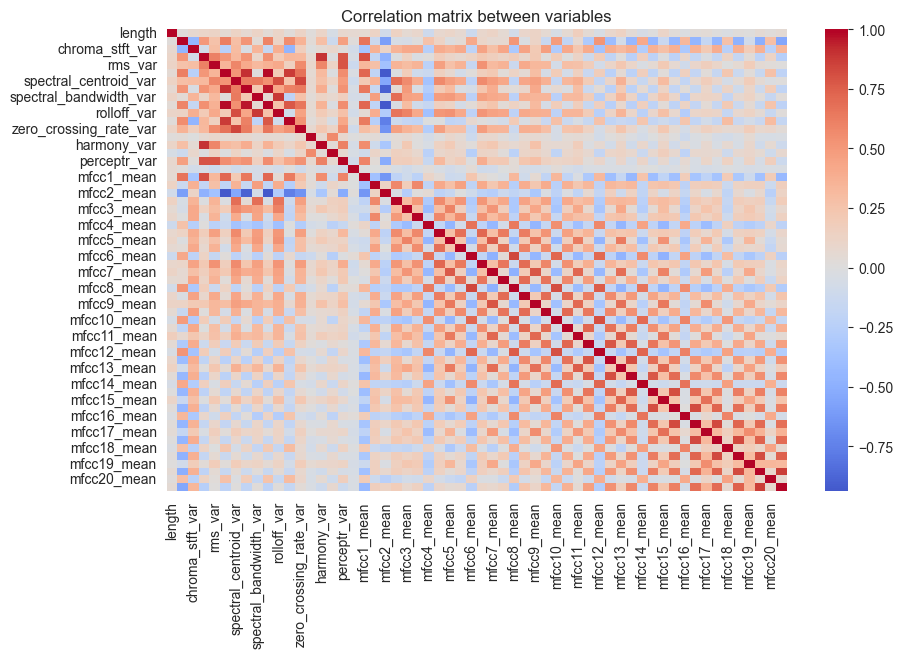

In [7]:
# Genereal variable correlation
corr = df.drop(columns=["label", "label_encoded"]).corr()
sns.heatmap(corr, cmap = "coolwarm", center = 0)
plt.title("Correlation matrix between variables")
plt.show()

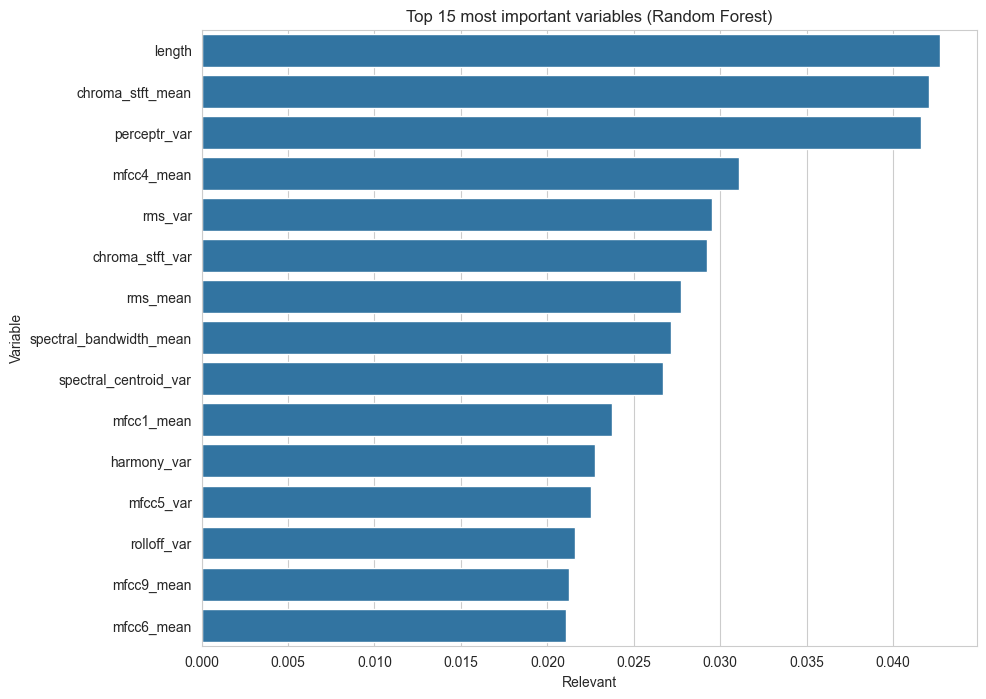

In [12]:
# Random Forest Model
# Variable importance
# Random Forest allows to measure the relevance of each characteristic to predict the genre

# Divide features and labels
X = df.drop(columns=["label", "label_encoded"])
y = df["label_encoded"]

#Fit the model
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
rf.fit(X, y)

#Extract importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Visualize
plt.figure(figsize=(10, 8))
sns.barplot(x=importances[:15], y=importances.index[:15])
plt.title("Top 15 most important variables (Random Forest)")
plt.xlabel("Relevant")
plt.ylabel("Variable")
plt.show()

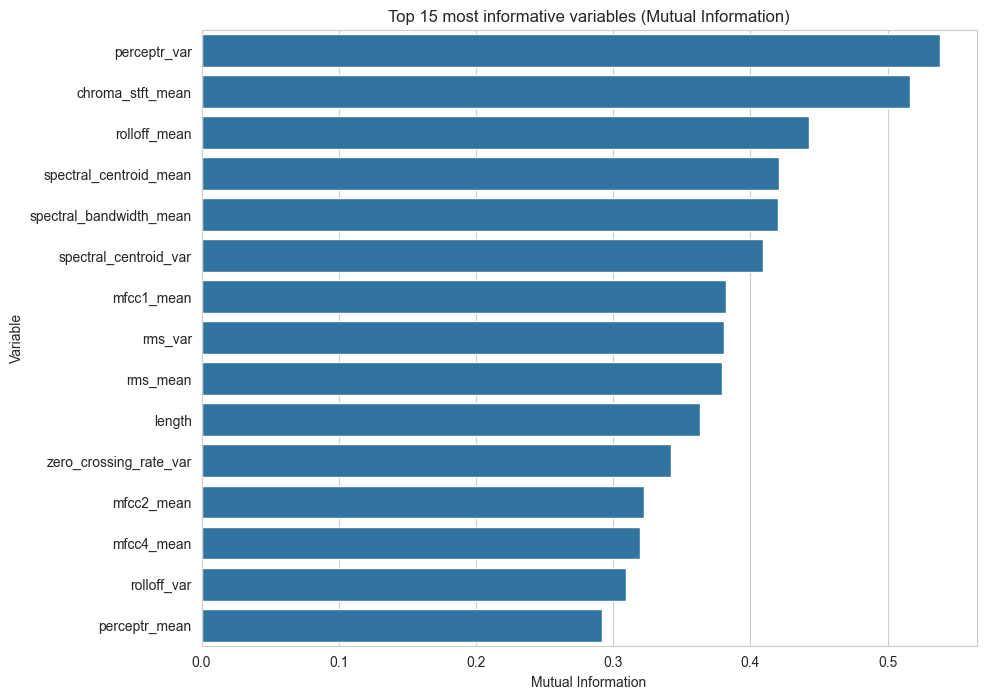

In [15]:
# Mutual Information
mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(10,8))
sns.barplot(x=mi_series[:15], y=mi_series.index[:15])
plt.title("Top 15 most informative variables (Mutual Information)")
plt.xlabel("Mutual Information")
plt.ylabel("Variable")
plt.show()

In [16]:
#Final variable selection
selected_features = list(importances.head(15).index)
print("Selected variables for supervised models")
print(selected_features)

Selected variables for supervised models
['length', 'chroma_stft_mean', 'perceptr_var', 'mfcc4_mean', 'rms_var', 'chroma_stft_var', 'rms_mean', 'spectral_bandwidth_mean', 'spectral_centroid_var', 'mfcc1_mean', 'harmony_var', 'mfcc5_var', 'rolloff_var', 'mfcc9_mean', 'mfcc6_mean']


In [17]:
#Save the subgroup for next notebooks
df_selected = df[selected_features + ["label", "label_encoded"]]
df_selected.to_csv(DATA_PATH + "features_selected.csv", index = False)
 